# 분류기만

In [1]:
import os
import pickle
import datetime

folder_path = 'dataset_224_224/'
x_train, y_train, x_val, y_val, x_test, y_test = [], [], [], [], [], []

with open(folder_path+'x_train.pickle', 'rb') as f:
    x_train = pickle.load(f)

with open(folder_path+'y_train.pickle', 'rb') as f:
    y_train = pickle.load(f)

with open(folder_path+'x_val.pickle', 'rb') as f:
    x_val = pickle.load(f)

with open(folder_path+'y_val.pickle', 'rb') as f:
    y_val = pickle.load(f)

with open(folder_path+'x_test.pickle', 'rb') as f:
    x_test = pickle.load(f)

with open(folder_path+'y_test.pickle', 'rb') as f:
    y_test = pickle.load(f)
    
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(17154, 224, 224, 3) (17154,) (5718, 224, 224, 3) (5718,) (5718, 224, 224, 3) (5718,)


In [2]:
train_images = x_train
train_labels = y_train
val_images = x_val
val_labels = y_val
test_images = x_test
test_labels = y_test

In [3]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization

import matplotlib.pyplot as plt
import os
import tensorflow as tf

y_train = tf.keras.utils.to_categorical(train_labels, 3)
y_val = tf.keras.utils.to_categorical(val_labels, 3)
y_test = tf.keras.utils.to_categorical(test_labels, 3)
y_train.shape, y_val.shape, y_test.shape

((17154, 3), (5718, 3), (5718, 3))

In [4]:
base_model = tf.keras.applications.EfficientNetB7(include_top=False, input_shape = (224, 224 ,3), weights = 'imagenet')
base_model.output_shape
base_model.trainable = False

# model.Sequential()없이 모델 구축하는 방법
inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False)
x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

checkpoint_path = "checkpoints/EfficientNetB7/cp-0-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

model_name = '_EffienctNetB7_1'
current_time = datetime.datetime.now().strftime("%Y%m%d") # Y : 연도 / m : 월 / d : 일 / H : 시 / M : 분 / S : 초

log_dir = "logs/" + current_time + model_name
board_effib7_1 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # epoch마다 히스토그램 계산


# categorical_crossentropy
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

# 모델 fitting
hist_classifi = model.fit(train_images, y_train, epochs = 30, validation_data=(val_images, y_val)
, batch_size=125, callbacks=[early, board_effib7_1])

Metal device set to: Apple M1


2022-11-30 22:11:18.191691: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-30 22:11:18.191998: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


258076736/258076736 [==============================] - 119s 0us/step
Epoch 1/30


2022-11-30 22:13:28.202529: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-30 22:13:36.405287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - ETA: 0s - loss: 1.9952 - accuracy: 0.6612

2022-11-30 22:26:23.370618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


138/138 [==============================] - 1040s 7s/step - loss: 1.9952 - accuracy: 0.6612 - val_loss: 0.5333 - val_accuracy: 0.7744
Epoch 2/30
138/138 [==============================] - 5236s 38s/step - loss: 0.5424 - accuracy: 0.7418 - val_loss: 0.4742 - val_accuracy: 0.7915
Epoch 3/30
138/138 [==============================] - 3311s 24s/step - loss: 0.4864 - accuracy: 0.7668 - val_loss: 0.4480 - val_accuracy: 0.8022
Epoch 4/30
138/138 [==============================] - 2636s 19s/step - loss: 0.4422 - accuracy: 0.7898 - val_loss: 0.4404 - val_accuracy: 0.8054
Epoch 5/30
138/138 [==============================] - 5599s 41s/step - loss: 0.4241 - accuracy: 0.8008 - val_loss: 0.4239 - val_accuracy: 0.8109
Epoch 6/30
138/138 [==============================] - 5073s 37s/step - loss: 0.3988 - accuracy: 0.8119 - val_loss: 0.4162 - val_accuracy: 0.8228
Epoch 7/30
138/138 [==============================] - 1437s 10s/step - loss: 0.3839 - accuracy: 0.8171 - val_loss: 0.4025 - val_accuracy: 0.81

[1.9951823949813843, 0.5424017906188965, 0.4863602817058563, 0.44221386313438416, 0.42406994104385376, 0.3988002836704254, 0.383916974067688, 0.369824081659317, 0.3604128360748291, 0.35470420122146606]
[0.6611868739128113, 0.7418094873428345, 0.7667599320411682, 0.7898449301719666, 0.8008044958114624, 0.8118805885314941, 0.8171272277832031, 0.8272706270217896, 0.8263961672782898, 0.8321674466133118]
[0.5332538485527039, 0.4742378890514374, 0.44798555970191956, 0.440386027097702, 0.42388445138931274, 0.4161829352378845, 0.4024977385997772, 0.41848549246788025, 0.416808545589447, 0.4028814435005188]
[0.7743966579437256, 0.791535496711731, 0.8022035956382751, 0.8053515553474426, 0.8109478950500488, 0.82284015417099, 0.8165442943572998, 0.8202168941497803, 0.8189926743507385, 0.828086793422699]


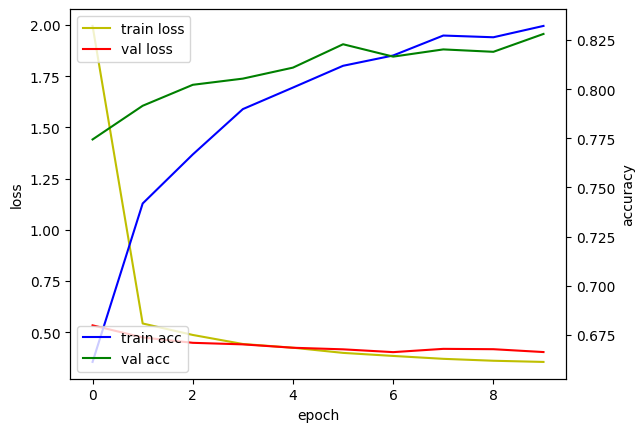

179/179 - 413s - loss: 0.3792 - accuracy: 0.8340 - 413s/epoch - 2s/step
loss:  0.3792400658130646 , acc:  0.8340328931808472


TypeError: Unable to serialize [2.0896919 2.1128855 2.108185 ] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

In [5]:
print(hist_classifi.history['loss'])
print(hist_classifi.history['accuracy'])
print(hist_classifi.history['val_loss'])
print(hist_classifi.history['val_accuracy'])

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_classifi.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_classifi.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_classifi.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist_classifi.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

#모델 검증
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print('loss: ', test_loss, ', acc: ', test_acc)  

model.save('models/EfficientNetB7_1.h5')

In [6]:
model.save('models/EfficientNetB7_1.h5')

TypeError: Unable to serialize [2.0896919 2.1128855 2.108185 ] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

# 하위층만

In [7]:
base_model = tf.keras.applications.EfficientNetB7(include_top=False, input_shape = (224, 224 ,3), weights = 'imagenet')

base_model.trainable = False
base_model.trainable = True

for layer in base_model.layers[:-20]: 
  layer.trainable = False				

for layer in base_model.layers[-100:]:	
  print(layer.name, layer.trainable)

inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model_efficientb7 = tf.keras.Model(inputs, outputs)

model_efficientb7.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

checkpoint_path = "checkpoints/EfficientNetB7/cp-2-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, # 고유한 파일이름 부여 가능 
    monitor='val_loss', # val_loss값을 기준으로 최저점일때를 기록하고 싶다면
    save_best_only=True, # True를 주면 monitor기준 최고상태 기록
    save_weights_only=False, # False면 모델 레이어 및 weight값 모두
    save_freq='epoch' # 체크포인트 저장하는 에폭주기 설정 가능
)

def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   else:
     return lr * 0.1

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

model_name = '_EfficientNetB7_2'
current_time = datetime.datetime.now().strftime("%Y%m%d") # Y : 연도 / m : 월 / d : 일 / H : 시 / M : 분 / S : 초

log_dir = "logs/" + current_time + model_name
board_effib7 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # epoch마다 히스토그램 계산

block6k_se_squeeze False
block6k_se_reshape False
block6k_se_reduce False
block6k_se_expand False
block6k_se_excite False
block6k_project_conv False
block6k_project_bn False
block6k_drop False
block6k_add False
block6l_expand_conv False
block6l_expand_bn False
block6l_expand_activation False
block6l_dwconv False
block6l_bn False
block6l_activation False
block6l_se_squeeze False
block6l_se_reshape False
block6l_se_reduce False
block6l_se_expand False
block6l_se_excite False
block6l_project_conv False
block6l_project_bn False
block6l_drop False
block6l_add False
block6m_expand_conv False
block6m_expand_bn False
block6m_expand_activation False
block6m_dwconv False
block6m_bn False
block6m_activation False
block6m_se_squeeze False
block6m_se_reshape False
block6m_se_reduce False
block6m_se_expand False
block6m_se_excite False
block6m_project_conv False
block6m_project_bn False
block6m_drop False
block6m_add False
block7a_expand_conv False
block7a_expand_bn False
block7a_expand_activation F

In [9]:
hist_classifi_2 = model_efficientb7.fit(train_images, y_train, epochs = 30, validation_data=(val_images, y_val), batch_size=125
                            , callbacks=[cp_callback, early, board_effib7, lr_schedule])

Epoch 1/30
138/138 [==============================] - ETA: 0s - loss: 0.3707 - accuracy: 0.8336

INFO:tensorflow:Assets written to: checkpoints/EfficientNetB7/cp-2-0001.ckpt/assets


INFO:tensorflow:Assets written to: checkpoints/EfficientNetB7/cp-2-0001.ckpt/assets


TypeError: Unable to serialize [2.0896919 2.1128855 2.108185 ] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.

In [ ]:
print(hist_classifi_2.history['loss'])
print(hist_classifi_2.history['accuracy'])
print(hist_classifi_2.history['val_loss'])
print(hist_classifi_2.history['val_accuracy'])

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_classifi.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_classifi.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_classifi.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist_classifi.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

#모델 검증
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print('loss: ', test_loss, ', acc: ', test_acc)  
model_efficientb7.save('models/EfficientNetB7_2.h5')

# 전부재학습

In [ ]:
base_model = tf.keras.applications.EfficientNetB7(include_top=False, input_shape = (224, 224 ,3), weights = 'imagenet')

base_model.trainable = True

inputs = tf.keras.Input(shape=(224, 224, 3))

x = base_model(inputs, training=False) # batchnorm 부분 update 방지

x = tf.keras.layers.Flatten(input_shape=base_model.output_shape[1:])(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x= tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(3, activation='softmax')(x)

model_effib7_3 = tf.keras.Model(inputs, outputs)

model_effib7_3.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                  loss = 'categorical_crossentropy',
                  metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

checkpoint_path = "checkpoints/EfficientNetB7/cp-3-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, # 고유한 파일이름 부여 가능 
    monitor='val_loss', # val_loss값을 기준으로 최저점일때를 기록하고 싶다면
    save_best_only=True, # True를 주면 monitor기준 최고상태 기록
    save_weights_only=False, # False면 모델 레이어 및 weight값 모두
    save_freq='epoch' # 체크포인트 저장하는 에폭주기 설정 가능
)

def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   else:
     return lr * 0.1

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

model_name = '_EfficientNetB7_3'
current_time = datetime.datetime.now().strftime("%Y%m%d") # Y : 연도 / m : 월 / d : 일 / H : 시 / M : 분 / S : 초

log_dir = "logs/" + current_time + model_name
board_effib7 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # epoch마다 히스토그램 계산

In [ ]:
hist_classifi_7 = model_effib7_3.fit(train_images, y_train, epochs = 30, validation_data=(val_images, y_val), batch_size=125
                            , callbacks=[cp_callback, early, board_effib7, lr_schedule])

In [ ]:
print(hist_classifi_7.history['loss'])
print(hist_classifi_7.history['accuracy'])
print(hist_classifi_7.history['val_loss'])
print(hist_classifi_7.history['val_accuracy'])

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_classifi_7.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_classifi_7.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_classifi_7.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist_classifi_7.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

#모델 검증
test_loss, test_acc = model_effib7_3.evaluate(test_images, y_test, verbose=2)
print('loss: ', test_loss, ', acc: ', test_acc)  
model_effib7_3.save('models/EfficientB7_3.h5')

# fine-tune

In [ ]:
## fine-tune
model_inception.trainable = True

model_inception.compile(optimizer = tf.keras.optimizers.Adam( learning_rate= 0.0001),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

checkpoint_path = "/Users/jeonminjeong/Downloads/알파코/프로젝트/이미지인식/checkpoints/EfficientNetB7/cp-4-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, # 고유한 파일이름 부여 가능 
    monitor='val_loss', # val_loss값을 기준으로 최저점일때를 기록하고 싶다면
    save_best_only=True, # True를 주면 monitor기준 최고상태 기록
    save_weights_only=False, # False면 모델 레이어 및 weight값 모두
    save_freq='epoch' # 체크포인트 저장하는 에폭주기 설정 가능
)

def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   else:
     return lr * 0.1

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=0)

model_name = '_EfficientNetB7_4'
current_time = datetime.datetime.now().strftime("%Y%m%d") # Y : 연도 / m : 월 / d : 일 / H : 시 / M : 분 / S : 초

log_dir = "logs/" + current_time + model_name
board_inception4 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1) # epoch마다 히스토그램 계산

In [ ]:
hist_classifi_8 = model.fit(train_images, y_train, epochs = 30, validation_data=(val_images, y_val), batch_size=125
                            , callbacks=[cp_callback, early, board_inception4, lr_schedule])

In [ ]:
print(hist_classifi_8.history['loss'])
print(hist_classifi_8.history['accuracy'])
print(hist_classifi_8.history['val_loss'])
print(hist_classifi_8.history['val_accuracy'])

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist_classifi_8.history['loss'], 'y', label='train loss')
loss_ax.plot(hist_classifi_8.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist_classifi_8.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist_classifi_8.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')

plt.show()

In [ ]:
#모델 검증
test_loss, test_acc = model_inception.evaluate(test_images, y_test, verbose=2)
print('loss: ', test_loss, ', acc: ', test_acc)  
model.save('models/EfficientB7_4.h5')